# **Streamlining Project Deadlines and Resource Allocation in a Competitive Construction Market**

### Welcome to the Colab notebook for a brief analysis of Mohra Company Limited's performance over 7 months. Over the past 15 years, Mohra has excelled in diverse construction projects in Riyadh. However, the company faces challenges with project deadlines and market competition.

### This notebook analyzes project performance and client profitability using sample data to anonymize actual clients while maintaining confidentiality, leveraging Python and stakeholder interviews. Key findings highlight the high profitability of institutional and residential projects, and the significant customer lifetime value of top clients like Aladdin Minecraft Co. Ltd.

### Our recommendations aim to enhance customer retention, improve project tracking, and diversify into smart building solutions and commercial real estate for sustainable growth.

## **Company overview**

Name: Mohra Company Limited (Single-Person Company)

- Sector: Construction Services
- Business Description: Mohra Limited Company is a construction firm specializing in residential and commercial projects, including new builds, renovations, and remodeling.
- Contact Information:
1. Phone: +966 56 225 6211
2. Email: info@mohraltd.com
- Website: [mohraltd.com](https://mohraltd.com/)
- Address: Post Box No. 4863, Postal Code 12865, Abdullah bin Mahmood Street, Al Farouq District, Riyadh, Kingdom of Saudi Arabia


**Mission Statement**

To provide high-quality construction and repair services that meet the unique needs of our clients, ensuring satisfaction and long-term value.

**Vision**

To be a leading construction company known for our commitment to quality, innovation, and customer satisfaction.

**Core Values**

- Quality: Delivering superior craftsmanship in every project.
- Integrity: Maintaining honesty and transparency with clients.
- Customer Satisfaction: Ensuring every client is happy with our work.
- Innovation: Continuously improving our methods and services.

## **Based on the interview:**

Mohra Company Limited stands as the primary enterprise, predominantly focused on construction activities. Under its umbrella, there are two subsidiaries: Atobake and Atom Middle East, the latter handling import operations. With a robust presence in Riyadh for approximately 15 years, Mohra has honed its expertise in construction, particularly in the development of fuel stations. Their portfolio includes petrol stations, restaurants, high-end villas, showrooms, and warehouses, encompassing all facets of general construction.

Mohra has successfully constructed numerous fuel stations for Petromin in Riyadh and completed several projects for SASCO. Their client base extends to Wafi, Shell, Arena, and various private owners, showcasing their versatility and capability in diverse construction projects. Operating across Saudi Arabia, Mohra maintains communication with its clients via phone and email, addressing new requirements and proactively inquiring about upcoming projects.

In addition to their primary focus, Mohra specializes in the construction of coffee shops and has built several upscale restaurants in Riyadh. They have also partnered with American franchises operating within the country. On an annual basis, Mohra undertakes projects valued between 4-5 million. Small projects typically range from 50k to 200k, while larger projects span from 2m to 15m. The volume of projects depends on the availability of contracts, with no significant seasonality affecting their operations. Mohra remains committed to exploring future opportunities within the construction industry.

## **Based on the questionnaire:**

Mohra focuses on general construction projects, including hotels, restaurants, villas, and petrol stations. Project scheduling is dependent on time availability. Despite significant competition in the construction industry, Mohra sometimes loses projects but also gains others, largely due to the strength of its client relationships. Occasionally, banks provide support, and the HR department assists in arranging manpower.

Every project at Mohra has a set deadline. Before starting, the company creates a project schedule to ensure that each activity aligns with the timeline. Depending on the site requirements, Mohra either handles all tasks internally or, if the workload is extensive, partially hires subcontractors. Progress is monitored through daily progress reports to ensure adherence to the project timeline.

Quality control at Mohra depends on site conditions. For civil works, the company hires a civil quality control inspector. When purchasing general materials, quality test reports are requested to ensure compliance with standards.

In terms of client relations and market position, Mohra presents its ongoing and completed projects, along with handover certificates, to potential clients. Timely project completion and quality work are top priorities in maintaining strong client relationships.

Looking ahead, Mohra plans to undertake larger projects and is actively exploring opportunities in the real estate business.

## **Data**

In [71]:
# Core Libraries
import pandas as pd
import numpy as np

# Other Important Libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

In [72]:
# Load CSV data
invoice_data = pd.read_csv('/content/sample_invoice_data.csv')
profit_data = pd.read_csv('/content/sample_profit_data.csv')
month_data = pd.read_csv('/content/sample_month_data.csv')

In [73]:
category = ['Commercial', 'Industrial', 'Commercial', 'Industrial', 'Residential', 'Commercial', 'Commercial', 'Institutional', 'Commercial', 'Institutional', 'Commercial', 'Industrial', 'Institutional', 'Institutional', 'Commercial']

# Create the 'Category' column and populate it with the provided categories
invoice_data['Category'] = category

In [74]:
invoice_data.head()

,Invoice #,Client Name,Invoice Date,Total Amount (SAR),Item & Description,Category
0,INV-000001,Captain America Contracting Co.,22-Mar-44,"103,097.50",Supply & installation of roof marine plywood,Commercial
1,INV-000004,Iron Man Resin Factory,29-Mar-44,"489,292.23","Mezzanine floor, lab work, interlocking work, ...",Industrial
2,INV-000005,Aladdin Minecraft Co. Ltd.,30-Mar-44,"625,416.00","General requirements, masonry work, metal work...",Commercial
3,INV-000006,Avengers Saudi Company,03-Apr-44,"20,493.00","ISO Panel Cutting (125), ISO Doors and Windows...",Industrial
4,INV-000007,Naruto Real Estate Company,14-Apr-44,"120,313.00",Villa fitout renovation,Residential


In [75]:
category_per_client = ['Industrial', 'Industrial', 'Institutional', 'Commercial', 'Commercial', 'Commercial', 'Industrial', 'Commercial', 'Residential']

# Create the 'Project Category' column and populate it with the provided categories
profit_data['Project Category'] = category_per_client

In [76]:
profit_data.head()
# profit_data.columns

,Client Name,Total Revenue (SAR),No. of Orders,Total Cost (SAR),Profit (SAR),Gross Profit Margin (%),Duration of Work (Days),Project Category
0,Avengers Saudi Company,20493.00,1,18033.84,2459.16,12,4,Industrial
1,Iron Man Resin Factory,489292.23,1,428787.54,60504.69,12,68,Industrial
2,Ursula Nemo Electromechanical Co.,180357.13,4,155210.45,25146.68,14,30,Institutional
3,SpongeBob Interiors L.L.C.,44735.00,2,40677.27,4057.73,9,10,Commercial
4,Captain America Contracting Co.,103097.50,1,91187.61,11909.89,12,22,Commercial


In [77]:
month_data

,Month,Total Revenue (SAR)
0,Apr-44,"140,806.00"
1,Mar-44,"1,217,805.73"
2,Aug-44,"301,492.75"
3,Jun-44,"70,725.00"
4,Jul-44,"20,585.00"
5,Sept-44,"29,921.00"


## **Analysis**

### **Contents**

1. Profitability and Duration by Project Type
2. Project Duration, Profit, and Cost Analysis
3. Client Behavior
4. Client vs. Total Revenue with Number of Orders
5. Monthly Revenue and Gross Profit Margin Trend
6. Client Lifetime Value (CLV) Analysis
7. Total Revenue vs. Total Cost by Project Category
8. Average Gross Profit Margins Across Different Project Categories
9. Top Clients by Average Profit Per Order
10. Distribution of Project Duration
11. Revenue per Order by Project Category
12. Client Clusters
13. Key Correlations Among Business Metrics



### 1. Profitability and Duration by Project Type

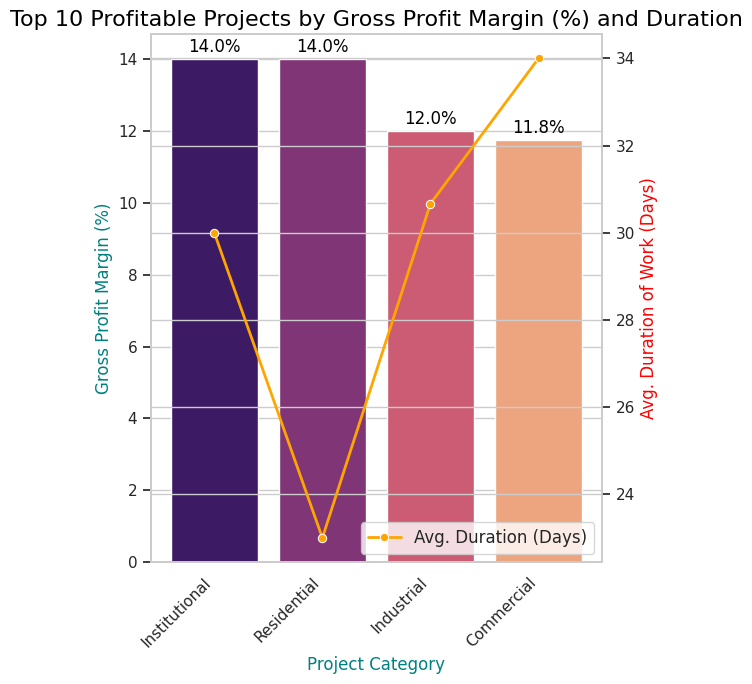

In [123]:
# Group by 'Project Category' to summarize profitability and duration
project_summary = profit_data.groupby('Project Category').agg({
    'Duration of Work (Days)': 'mean',
    'Gross Profit Margin (%)': 'mean'
}).reset_index()

# Sort by highest gross profit margin
profitable_projects = project_summary.sort_values(by='Gross Profit Margin (%)', ascending=False).head(10)

# Plotting the chart with shorter names
plt.figure(figsize=(6, 7))

# Create a twin-axis plot (dual y-axis) to show both Gross Profit Margin and Duration of Work
ax1 = sns.barplot(
    x='Project Category',
    y='Gross Profit Margin (%)',
    data=profitable_projects,
    palette='magma',
    dodge=False
)
ax1.set_title('Top 10 Profitable Projects by Gross Profit Margin (%) and Duration', fontsize=16, color='black')
ax1.set_xlabel('Project Category', fontsize=12, color='teal')
ax1.set_ylabel('Gross Profit Margin (%)', fontsize=12, color='teal')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Adding values on bars
for bar, value in zip(ax1.patches, profitable_projects['Gross Profit Margin (%)']):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.2,
        f"{value:.1f}%",
        ha='center',
        fontsize=12,
        color='black'
    )

# Create a secondary y-axis to show the Duration of Work (Days) on the same chart
ax2 = ax1.twinx()
sns.lineplot(
    x='Project Category',
    y=profitable_projects['Duration of Work (Days)'],
    data=profitable_projects,
    ax=ax2,
    color='orange',
    marker='o',
    linewidth=2,
    label="Avg. Duration (Days)"
)
ax2.set_ylabel('Avg. Duration of Work (Days)', fontsize=12, color='red')

# Adding legends and improving layout
ax2.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

**Observations:**

The chart illustrates the leading project categories by gross profit margin (%) and their associated average project durations (in days). Institutional and Residential projects top the list with the highest gross profit margins of 14%, indicating strong profitability while maintaining moderate average durations. Industrial projects, with a slightly lower margin of 12%, involve longer durations, suggesting potential complexity or scale. Commercial projects, showing an 11.8% margin and the highest average duration of 34 days, highlight areas for efficiency improvements in longer-term projects. This analysis emphasizes the importance of balancing profitability with project timelines to optimize overall efficiency.

**Insights:**

Prioritizing high-margin projects, specifically Institutional and Residential ones, is essential as they offer the highest gross profit margins and are both profitable and manageable within moderate durations. To enhance efficiency in Commercial projects, a detailed analysis should be conducted to identify bottlenecks, given their highest average duration.

### 2. Project Duration, Profit, and Cost Analysis

Correlation Matrix:
                         Duration of Work (Days)  Profit (SAR)  \
Duration of Work (Days)                 1.000000      0.993925   
Profit (SAR)                            0.993925      1.000000   
Total Cost (SAR)                        0.995741      0.998305   

                         Total Cost (SAR)  
Duration of Work (Days)          0.995741  
Profit (SAR)                     0.998305  
Total Cost (SAR)                 1.000000  


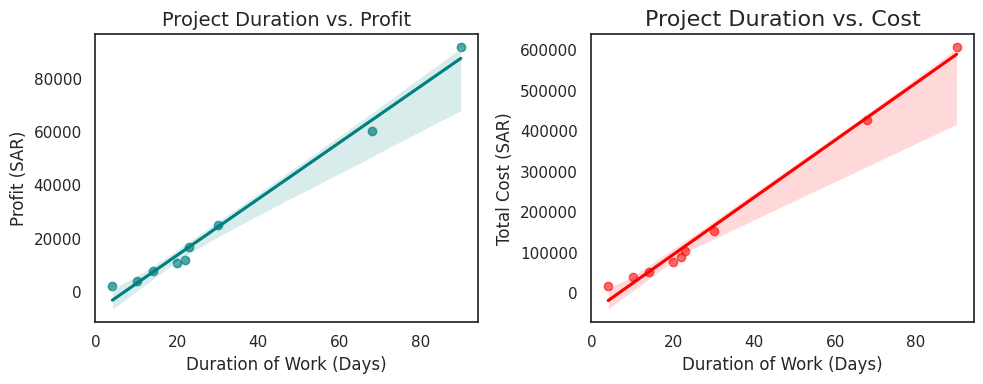

In [79]:
# Convert 'Profit (SAR)' and 'Total Cost (SAR)' to string if they are not already
profit_data['Profit (SAR)'] = profit_data['Profit (SAR)'].astype(str)  # Convert to string
profit_data['Total Cost (SAR)'] = profit_data['Total Cost (SAR)'].astype(str)  # Convert to string

# Use str.replace and pd.to_numeric
profit_data['Profit (SAR)'] = pd.to_numeric(profit_data['Profit (SAR)'].str.replace(',', ''), errors='coerce')
profit_data['Total Cost (SAR)'] = pd.to_numeric(profit_data['Total Cost (SAR)'].str.replace(',', ''), errors='coerce')

# Create a dedicated DataFrame
duration_profit_cost = profit_data[['Duration of Work (Days)', 'Profit (SAR)', 'Total Cost (SAR)']].copy()

# Calculate and Display Correlation Matrix
correlation_matrix = duration_profit_cost.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualization with Seaborn's regplot
# Create a figure with two subplots (one for profit, one for cost)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot Duration vs Profit with regression line and confidence interval
sns.regplot(x='Duration of Work (Days)', y='Profit (SAR)', data=duration_profit_cost, ax=axes[0], color='teal', scatter_kws={'alpha':0.7})
axes[0].set_title('Project Duration vs. Profit', fontsize=14)

# Plot Duration vs Cost with regression line and confidence interval (scaled down)
sns.regplot(x='Duration of Work (Days)', y='Total Cost (SAR)', data=duration_profit_cost, ax=axes[1], color='red', scatter_kws={'alpha':0.6})
axes[1].set_title('Project Duration vs. Cost', fontsize=16)
axes[1].set_ylabel('Total Cost (SAR)')

# Improve layout
plt.tight_layout()
plt.show()

**Observations:**

There is a clear positive linear relationship between project duration and profit, with longer projects tending to generate higher profits, likely due to the complexity or scale of work involved. Additionally, a strong positive correlation is observed between project duration and cost, with expenses increasing significantly over longer durations, likely due to material, labor, and resource costs. While longer projects yield higher profits, they also incur substantially higher costs, making it crucial to closely monitor profitability margins to ensure these projects are worth the investment. Larger projects may justify bringing in additional contract labor or specialized workers when necessary. Optimizing costs for longer-duration projects is essential to improve profit margins, whereas shorter projects may offer better cost efficiency but should be evaluated against their potential profitability.

### 3. Client Behavior

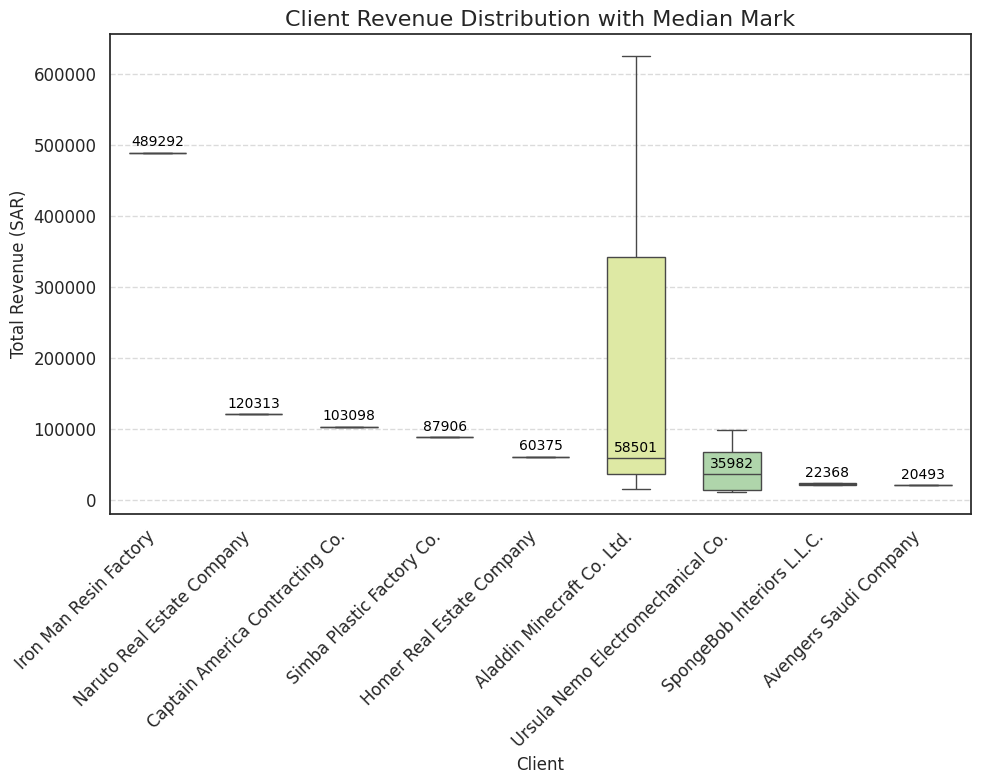

In [80]:
# Convert to string, replace any commas, and then convert to numeric
invoice_data['Total Amount (SAR)'] = pd.to_numeric(invoice_data['Total Amount (SAR)'].astype(str).str.replace(',', ''), errors='coerce')

# Sort data by median revenue for better visualization
client_order = invoice_data.groupby('Client Name')['Total Amount (SAR)'].median().sort_values(ascending=False).index
invoice_data['Client Name'] = pd.Categorical(invoice_data['Client Name'], categories=client_order, ordered=True)

plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.boxplot(
    x='Client Name',
    y='Total Amount (SAR)',
    data=invoice_data,
    palette="Spectral",
    showfliers=False,  # Remove outliers for clear visualization of the distribution
    width=0.6  # Adjust width of boxes
)

plt.title('Client Revenue Distribution with Median Mark', fontsize=16)
plt.xlabel('Client', fontsize=12)
plt.ylabel('Total Revenue (SAR)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Add median values as annotations for each box plot
medians = invoice_data.groupby('Client Name')['Total Amount (SAR)'].median().values
for i, median in enumerate(medians):
    plt.text(i, median + 5000, f'{median:.0f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

> Which clients provide the most revenue potential despite variability, and how should Mohra manage them?

**Answer:** Clients like Aladdin Minecraft Co. Ltd. show higher revenue potential, as they generate large revenue ranges. However, the variability in revenue suggests that these clients may offer irregular or project-specific opportunities. To ensure steady revenue from such clients, Mohra should focus on long-term contracts or service agreements to smooth out the variability.


### 4. Client vs. Total Revenue with Number of Orders

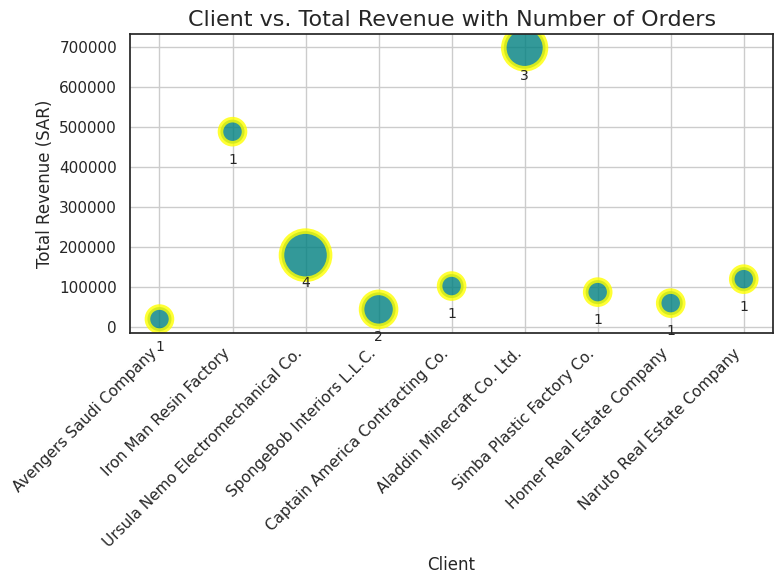

In [81]:
# Data for number of orders
data = {
    'Client Name': [
        'Avengers Saudi Company',
        'Iron Man Resin Factory',
        'Ursula Nemo Electromechanical Co.',
        'SpongeBob Interiors L.L.C.',
        'Captain America Contracting Co.',
        'Aladdin Minecraft Co. Ltd.',
        'Simba Plastic Factory Co.',
        'Homer Real Estate Company',
        'Naruto Real Estate Company'
    ],
    'Total Revenue (SAR)': [20493.00, 489292.23, 180357.13, 44735.00, 103097.50, 698916.62,
                            87906.00, 60375.00, 120313.00],
    'Number of Orders': [1, 1, 4, 2, 1, 3, 1, 1, 1]
}

# Creating the DataFrame
df_orders = pd.DataFrame(data)

# Plotting the bubble chart
plt.figure(figsize=(8, 6))

# Bubble chart: X-axis = Service Type, Y-axis = Total Revenue, Bubble Size = Number of Orders
plt.scatter(df_orders['Client Name'], df_orders['Total Revenue (SAR)'],
            s=df_orders['Number of Orders'] * 300,  # Scale the bubble size
            alpha=0.8, c='teal', edgecolors="yellow", linewidth=4)

# Add text labels for each bubble (Service Type)
for i in range(df_orders.shape[0]):
    plt.text(df_orders['Client Name'][i], df_orders['Total Revenue (SAR)'][i] - 80000,
             df_orders['Number of Orders'][i], fontsize=10, ha='center')

# Customizing the chart
plt.title('Client vs. Total Revenue with Number of Orders', fontsize=16)
plt.xlabel('Client', fontsize=12)
plt.ylabel('Total Revenue (SAR)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [82]:
# Calculate the total revenue
total_revenue = profit_data['Total Revenue (SAR)'].sum()

# Filter for orders greater than 1
filtered_data = profit_data[profit_data['No. of Orders'] > 1]

# Calculate the revenue for orders greater than 1
revenue_orders_gt1 = filtered_data['Total Revenue (SAR)'].sum()

# Calculate the percentage
percentage = (revenue_orders_gt1 / total_revenue) * 100

print(f'{percentage:.2f}% of total revenue is from orders > 1')

51.18% of total revenue is from orders > 1


> **Repeat Business Potential:** What percentage of revenue comes from repeat clients, and how can Mohra nurture these relationships to secure more long-term contracts?


**Answer:** Around 50% of revenue comes from repeat clients like Ursula Nemo Electromechanical Co. and Aladdin Minecraft Co. Ltd.

Mohra should focus on offering personalized services to these clients and work to secure long-term contracts. Fostering these relationships will ensure stable revenue and allow the company to compete with larger firms. Incentives like multi-year service contracts or discounted rates for frequent orders could enhance client loyalty.

> How should Mohra approach clients that bring in high revenue from a small number of orders?

**Answer:** Clients like Iron Man Resin Factory and Naruto Real Estate Company generate substantial revenue with very few orders (e.g., a single large project). While these clients can bring in high-value contracts, relying solely on them may lead to long gaps between projects.

**Action:** For high-value clients with few orders, focus on delivering high-quality results to secure repeat business. Additionally, Mohra can offer incentives for additional projects (e.g., discounted rates for second projects) or encourage these clients to sign long-term contracts.

> What insights can Mohra derive from clients who have a high number of orders but lower revenue, and how can this be optimized?

**Answer:** In cases like Ursula Nemo Electromechanical Co. and SpongeBob Interiors L.L.C., which have a higher number of orders but relatively lower total revenue compared to the top clients, it may indicate that the projects are frequent but smaller in scope. These clients might need smaller-scale but recurring services, which could strain resources without delivering high profits.

**Action:** Mohra should review the scope and profitability of these projects. If the margins are low, it may be worth adjusting pricing, reducing scope, or prioritizing higher-value projects. This will ensure that Mohra allocates its limited resources to the most profitable clients.

**Insights:**

Clients like Iron Man Resin Factory and Naruto Real Estate Company represent high-value, low-frequency contracts, which are essential for scaling up the company. Meanwhile, Ursula Nemo Electromechanical and SpongeBob Interiors L.L.C. offer smaller, frequent projects, helping with consistent cash flow.



### 5. Monthly Revenue and Gross Profit Margin Trend

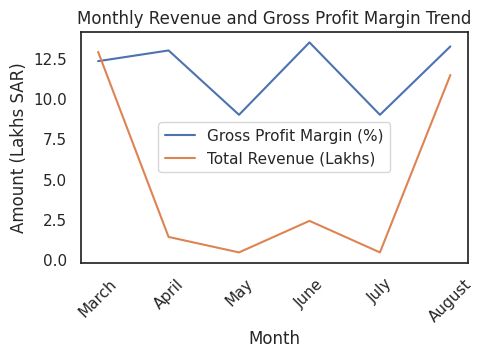

In [83]:
# Clean the data (convert columns to numeric where necessary)
profit_data['Total Revenue (SAR)'] = profit_data['Total Revenue (SAR)'].replace(',', '', regex=True).astype(float)
profit_data['Profit (SAR)'] = profit_data['Profit (SAR)'].replace(',', '', regex=True).astype(float)

# Merge the invoice_data with profit_data to bring in Invoice Date
profit_with_dates = profit_data.merge(invoice_data[['Client Name', 'Invoice Date']], on='Client Name', how='left')

# Convert 'Invoice Date' to datetime format
profit_with_dates['Invoice Date'] = pd.to_datetime(profit_with_dates['Invoice Date'], format='%d-%b-%y', errors='coerce')

# Group by month and calculate total revenue using Invoice Date
monthly_profitability = profit_with_dates.groupby(profit_with_dates['Invoice Date'].dt.strftime('%B')).agg({
    'Total Revenue (SAR)': 'sum',
    'Gross Profit Margin (%)': 'mean'  # Using the existing column
}).reset_index()

# Sort the months in calendar order
monthly_profitability['Invoice Date'] = pd.Categorical(monthly_profitability['Invoice Date'],
                                                       categories=pd.date_range(start='2044-01-01', periods=12, freq='M').strftime('%B'),
                                                       ordered=True)
monthly_profitability = monthly_profitability.sort_values('Invoice Date')

# Generate the chart with formatted Y-axis
plt.figure(figsize=(5, 3))

# Plot the Gross Profit Margin (%) as is
sns.lineplot(data=monthly_profitability, x='Invoice Date', y='Gross Profit Margin (%)', label='Gross Profit Margin (%)')

# Plot the Total Revenue (SAR) divided by 1 lakh to display values in lakhs
sns.lineplot(data=monthly_profitability, x='Invoice Date', y=monthly_profitability['Total Revenue (SAR)'] / 100000, label='Total Revenue (Lakhs)')

# Adjust Y-axis label and title
plt.title('Monthly Revenue and Gross Profit Margin Trend')
plt.xlabel('Month')
plt.ylabel('Amount (Lakhs SAR)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


**Observations:**

The chart shows fluctuations in revenue and profit margins across different months, with high revenue in **March** and **August**, and lower revenue in **April** and **May**. However, the gross profit margin remains relatively stable, indicating consistent profitability. No seasonality is observed in the construction market.


### 6. Client Lifetime Value (CLV) Analysis

In [84]:
# Creating the CLV DataFrame (replace this with actual data loading if available as CSV)
data = {
    "Client Name": [
        'Avengers Saudi Company',
        'Iron Man Resin Factory',
        'Ursula Nemo Electromechanical Co.',
        'SpongeBob Interiors L.L.C.',
        'Captain America Contracting Co.',
        'Aladdin Minecraft Co. Ltd.',
        'Simba Plastic Factory Co.',
        'Homer Real Estate Company',
        'Naruto Real Estate Company'
    ],
    "Avg. Purchase Value (SAR)": [20493, 489292.23, 45089.28, 22367.5, 103097.5, 232972.21, 87906, 60375, 120313],
    "Avg. Frequency Rate": [0.11, 0.11, 0.44, 0.22, 0.11, 0.33, 0.11, 0.11, 0.11],
    "Avg. Customer Lifespan (Years)": [0.44, 0.56, 0.22, 0.11, 0.22, 0.56, 0.44, 0.06, 0.22],
    "CLV": [1012, 30203.22, 4453.26, 552.28, 2545.62, 43143, 4341.04, 372.69, 2970.69]
}

clv_data = pd.DataFrame(data)

# Additional Insights - Summary Table
summary = clv_data.describe()

summary


,Avg. Purchase Value (SAR),Avg. Frequency Rate,Avg. Customer Lifespan (Years),CLV
count,9.000000,9.000000,9.000000,9.000000
mean,131322.857778,0.183333,0.314444,9954.866667
std,149123.241569,0.122984,0.188886,15560.800118
min,20493.000000,0.110000,0.060000,372.690000
25%,45089.280000,0.110000,0.220000,1012.000000
50%,87906.000000,0.110000,0.220000,2970.690000
75%,120313.000000,0.220000,0.440000,4453.260000
max,489292.230000,0.440000,0.560000,43143.000000


In [85]:
clv_data.shape

(9, 5)

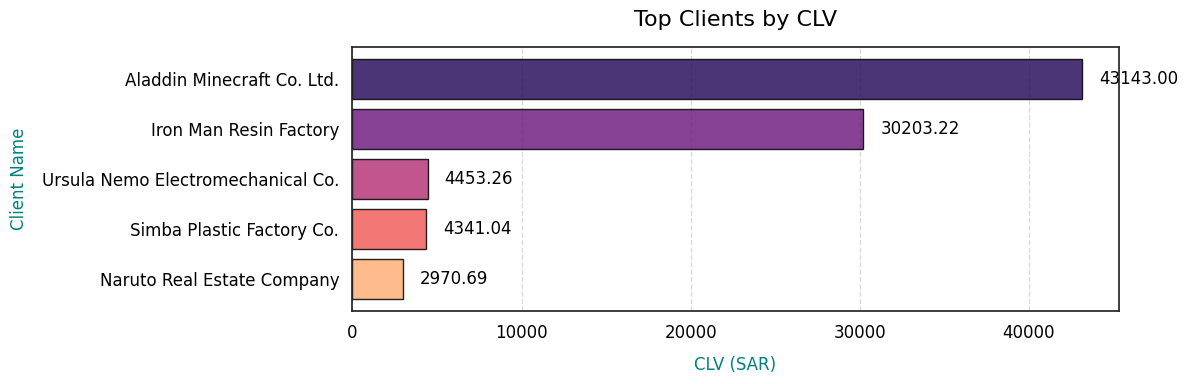

In [86]:
# Sorting data by CLV for better visualization
clv_data = clv_data.sort_values(by="CLV", ascending=False)

# Modify the visualization to show only the top 5 clients based on CLV
top_5_clv_data = clv_data.head(5)  # Select the top 5 clients

# Visualization for top 5 CLV
plt.figure(figsize=(12, 4))

# Colors for bars based on CLV values
colors = sns.color_palette("magma", len(top_5_clv_data))

# Bar plot for CLV (Top 5)
bars = plt.barh(top_5_clv_data["Client Name"], top_5_clv_data["CLV"], color=colors, edgecolor='black', alpha=0.85)

# Title and labels
plt.title("Top Clients by CLV", fontsize=16, color="black", pad=15)
plt.xlabel("CLV (SAR)", fontsize=12, color="teal", labelpad=10)
plt.ylabel("Client Name", fontsize=12, color="teal", labelpad=10)

# Tick parameters for better readability
plt.xticks(fontsize=12, color="black")
plt.yticks(fontsize=12, color="black")
plt.gca().invert_yaxis()  # Highest CLV at the top

# Adding values on bars
for bar, clv in zip(bars, top_5_clv_data["CLV"]):
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2, f"{clv:.2f}", va='center', fontsize=12, color='black')

# Grid and layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

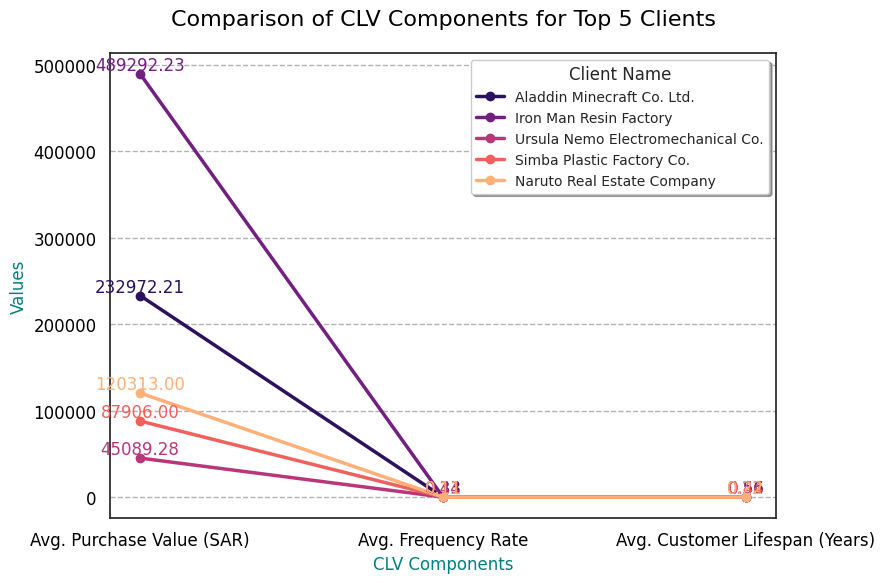

In [87]:
# Line Chart: Comparing Components of CLV (Purchase Value, Frequency Rate, Customer Lifespan)
components = top_5_clv_data[["Avg. Purchase Value (SAR)", "Avg. Frequency Rate", "Avg. Customer Lifespan (Years)"]].T
components.columns = top_5_clv_data["Client Name"]

# Define a contrasting color palette
line_colors = sns.color_palette("magma", len(components.columns))

# Plot the chart
plt.figure(figsize=(9, 6))
for idx, client in enumerate(components.columns):
    plt.plot(
        components.index,
        components[client],
        marker='o',  # Adding circular markers
        linestyle='-',
        linewidth=2.5,  # Thicker lines
        color=line_colors[idx],  # Assign unique color for each client
        label=client  # Display client name
    )

# Add values to each data point
for idx, client in enumerate(components.columns):
    for x, y in zip(components.index, components[client]):
        plt.text(
            x, y, f"{y:.2f}", fontsize=12, ha='center', va='bottom', color=line_colors[idx]
        )

# Title and labels
plt.title("Comparison of CLV Components for Top 5 Clients", fontsize=16, color="black", pad=20)
plt.ylabel("Values", fontsize=12, color="teal")
plt.xlabel("CLV Components", fontsize=12, color="teal")

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6, color="gray")

# Customizing ticks
plt.xticks(fontsize=12, color="black")
plt.yticks(fontsize=12, color="black")

# Legend
plt.legend(
    fontsize=10,
    title="Client Name",
    title_fontsize=12,
    fancybox=True,
    shadow=True,
    frameon=True
)

plt.tight_layout()
plt.show()

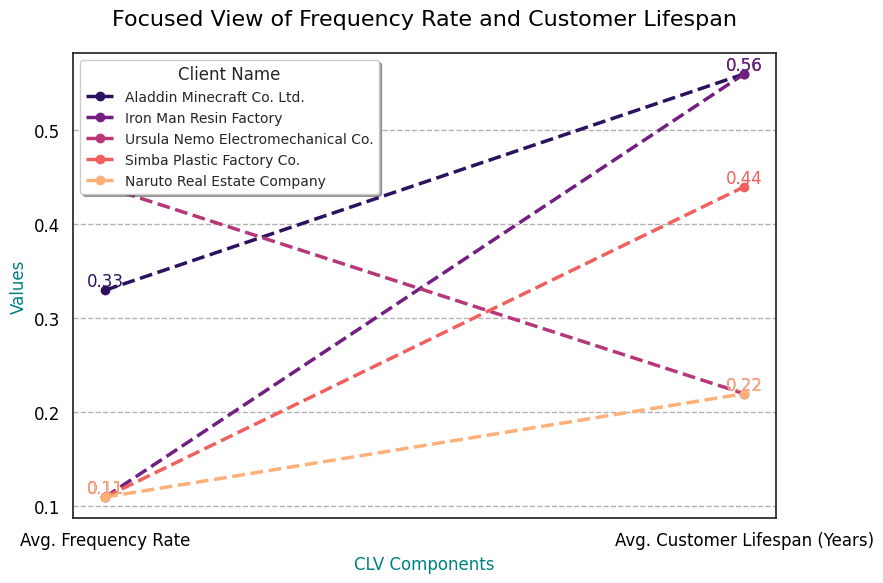

In [88]:
# Line Chart: Zoomed Graph of Frequency Rate and Customer Lifespan
components = top_5_clv_data[["Avg. Frequency Rate", "Avg. Customer Lifespan (Years)"]].T
components.columns = top_5_clv_data["Client Name"]

# Define a contrasting color palette
line_colors = sns.color_palette("magma", len(components.columns))

# Plot the chart
plt.figure(figsize=(9, 6))
for idx, client in enumerate(components.columns):
    plt.plot(
        components.index,
        components[client],
        marker='o',  # Adding circular markers
        linestyle='--',
        linewidth=2.5,  # Thicker lines
        color=line_colors[idx],  # Assign unique color for each client
        label=client  # Display client name
    )

# Add values to each data point
for idx, client in enumerate(components.columns):
    for x, y in zip(components.index, components[client]):
        plt.text(
            x, y, f"{y:.2f}", fontsize=12, ha='center', va='bottom', color=line_colors[idx]
        )

# Title and labels
plt.title("Focused View of Frequency Rate and Customer Lifespan", fontsize=16, color="black", pad=20)
plt.ylabel("Values", fontsize=12, color="teal")
plt.xlabel("CLV Components", fontsize=12, color="teal")

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6, color="gray")

# Customizing ticks
plt.xticks(fontsize=12, color="black")
plt.yticks(fontsize=12, color="black")

# Legend
plt.legend(
    fontsize=10,
    title="Client Name",
    title_fontsize=12,
    fancybox=True,
    shadow=True,
    frameon=True
)

plt.tight_layout()
plt.show()

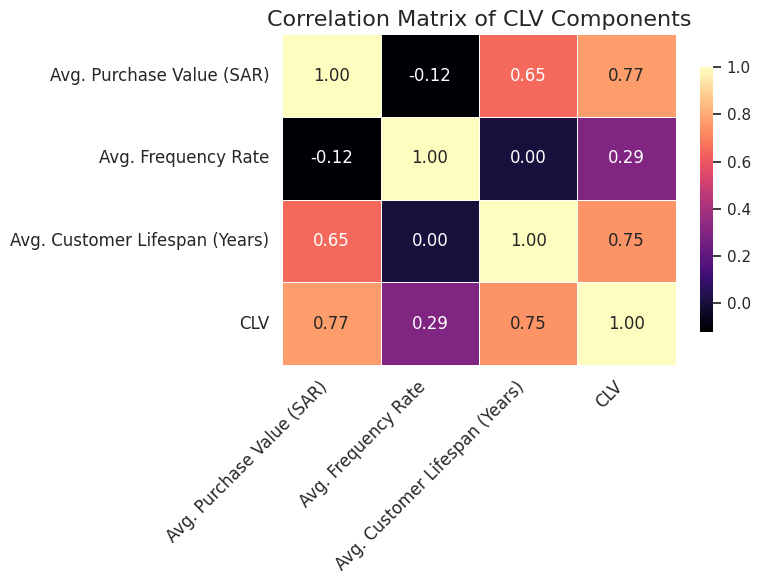

In [89]:
# Select relevant columns
cols_for_heatmap = ['Avg. Purchase Value (SAR)', 'Avg. Frequency Rate', 'Avg. Customer Lifespan (Years)', 'CLV']
corr_matrix = clv_data[cols_for_heatmap].corr()

# Enhancements:
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.set_theme(style="white")  # Set white background
cmap = sns.diverging_palette(220, 20, as_cmap=True)  # Diverging color palette

# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='magma',
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 12}  # Increase annotation size
)

# Beautify:
plt.title('Correlation Matrix of CLV Components', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis labels
plt.tight_layout()
plt.show()

**Observations:**

The CLV analysis reveales that clients such as Al-Afaq Al-Mumtada Co. Ltd. and
Industrial Resin Factory offer the highest customer lifetime value (CLV) and profitability.
The variability in CLV among top clients suggests opportunities to enhance customer
frequency and retention through tailored strategies. The correlation heatmap indicates that
purchase value significantly impacts overall profitability, whereas order frequency has a
limited influence.

### 7. Total Revenue vs. Total Cost by Project Category

In [90]:
# Set a consistent theme for all plots
sns.set_theme(style="whitegrid", palette="magma")

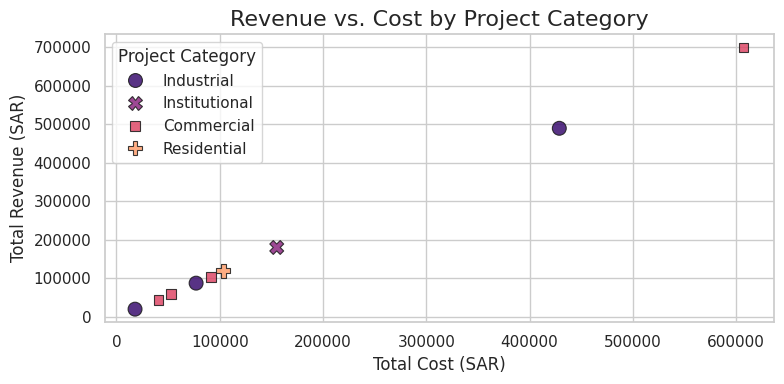

In [91]:
# Total Revenue vs. Total Cost by Project Category (Scatter Plot)
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=profit_data,
    x='Total Cost (SAR)',
    y='Total Revenue (SAR)',
    hue='Project Category',
    style='Project Category',  # Differentiate by marker style
    s=100,
    edgecolor='k',
    alpha=0.85,
    palette='magma'  # Use a contrasting color palette
)
plt.title("Revenue vs. Cost by Project Category", fontsize=16)
plt.xlabel("Total Cost (SAR)", fontsize=12)
plt.ylabel("Total Revenue (SAR)", fontsize=12)
plt.legend(title="Project Category")
plt.tight_layout()
plt.show()

**Observations:**

Industrial projects exhibit the highest costs and revenues, indicating their capital-intensive nature, while residential and commercial projects have moderate costs and revenues. Institutional projects, in contrast, display the lowest costs and revenues among all categories.

### 8. Average Gross Profit Margins Across Different Project Categories

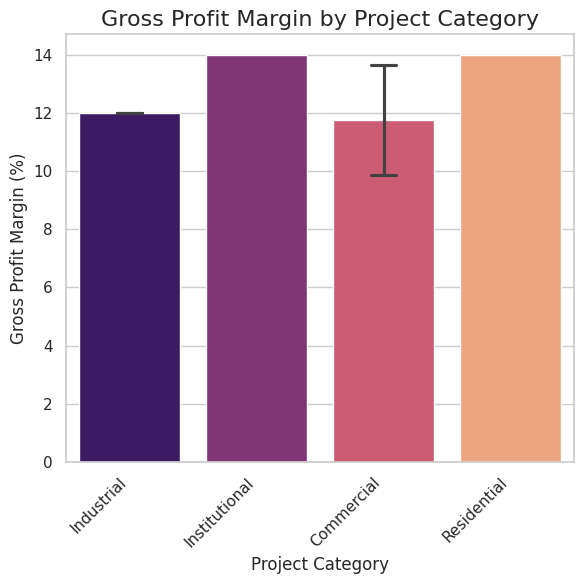

In [92]:
# Create the grouped bar plot with error bars
plt.figure(figsize=(6, 6))
sns.barplot(
    data=profit_data,
    x='Project Category',
    y='Gross Profit Margin (%)',
    ci="sd",  # Show standard deviation as error bars
    capsize=.2,  # Add caps to error bars
    palette='magma'
)
plt.title("Gross Profit Margin by Project Category", fontsize=16)
plt.xlabel("Project Category", fontsize=12)
plt.ylabel("Gross Profit Margin (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observations:**

Institutional and residential projects
consistently achieve higher profit margins,
highlighting their potential for strategic focus.

### 9. Top Clients by Average Profit Per Order

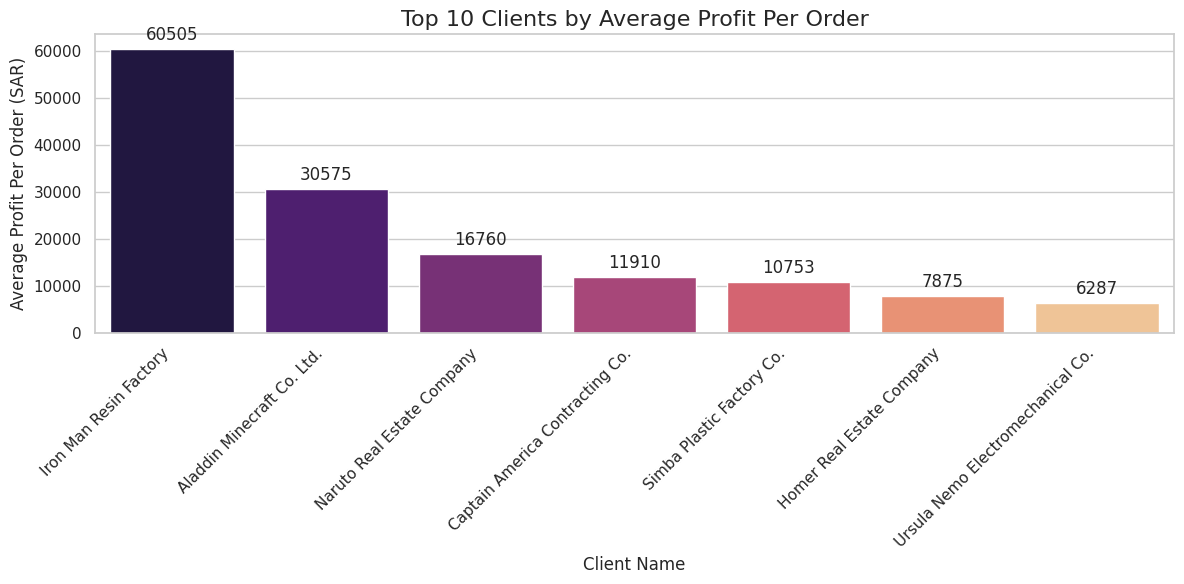

In [93]:
# Calculate average profit per order for each client
client_profitability = profit_data.groupby('Client Name').agg({'Profit (SAR)': 'sum', 'No. of Orders': 'sum'})
client_profitability['Avg Profit Per Order'] = client_profitability['Profit (SAR)'] / client_profitability['No. of Orders']
client_profitability = client_profitability.sort_values(by='Avg Profit Per Order', ascending=False).reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=client_profitability.head(7), x='Client Name', y='Avg Profit Per Order', palette='magma')
plt.title("Top 10 Clients by Average Profit Per Order", fontsize=16)
plt.xlabel("Client Name", fontsize=12)
plt.ylabel("Average Profit Per Order (SAR)", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add values on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.tight_layout()
plt.show()

**Observations:**

Clients like Iron Man Resin Factory and Aladdin Minecraft Co. Ltd. generate the highest average profit per order. These clients typically engage in larger-scale industrial and commercial projects.


**Insights:**

Mohra’s reliance on a few high-value clients is typical for small construction companies. Seek out new clients in similar sectors (e.g., industrial manufacturing or large-scale real estate) to reduce dependence on any one client. This will provide a more stable revenue stream and mitigate risk if a major client slows down.

### 10. Distribution of Project Duration

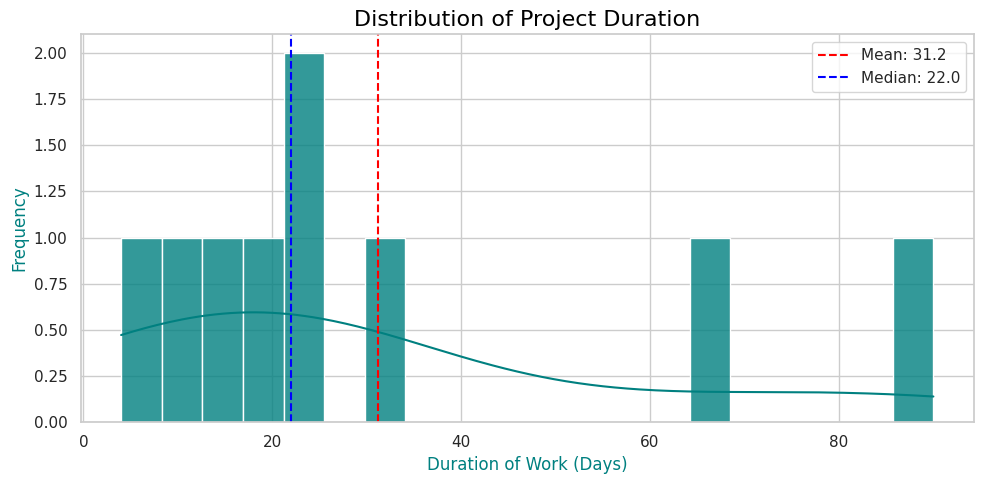

In [94]:
# Distribution of Project Duration
plt.figure(figsize=(10, 5))
sns.histplot(data=profit_data, x='Duration of Work (Days)', kde=True, bins=20, color='teal', alpha=0.8)
plt.title("Distribution of Project Duration", fontsize=16, color="black")
plt.xlabel("Duration of Work (Days)", fontsize=12, color="teal")
plt.ylabel("Frequency", fontsize=12, color="teal")

# Add mean and median lines for better insight
mean_duration = profit_data['Duration of Work (Days)'].mean()
median_duration = profit_data['Duration of Work (Days)'].median()
plt.axvline(mean_duration, color='red', linestyle='--', label=f"Mean: {mean_duration:.1f}")
plt.axvline(median_duration, color='blue', linestyle='--', label=f"Median: {median_duration:.1f}")
plt.legend()

plt.tight_layout()
plt.show()

**Observations:**

The distribution of project durations is right-skewed, with the mean duration (31.2 days) being higher than the median (22 days), suggesting a few longer-duration outliers. Most projects are completed within 20–30 days, making them the most common duration range.


### 11. Revenue per Order by Project Category

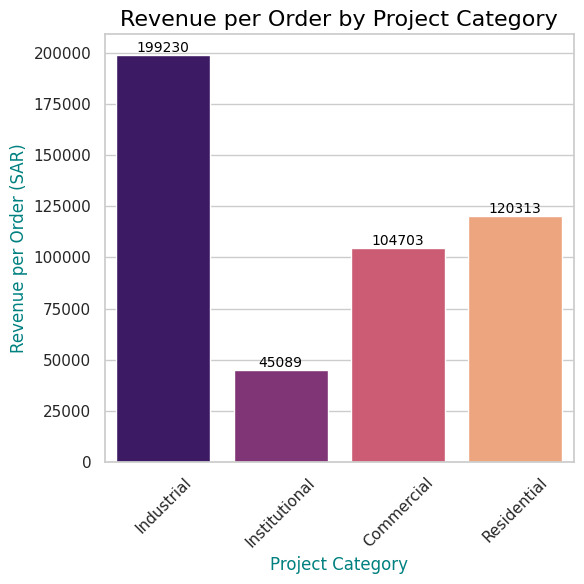

In [95]:
# Revenue per Order by Project Category
profit_data['Revenue per Order'] = profit_data['Total Revenue (SAR)'] / profit_data['No. of Orders']
plt.figure(figsize=(6, 6))
sns.barplot(data=profit_data, x='Project Category', y='Revenue per Order', ci=None, palette='magma')
plt.title("Revenue per Order by Project Category", fontsize=16, color="black")
plt.xlabel("Project Category", fontsize=12, color="teal")
plt.ylabel("Revenue per Order (SAR)", fontsize=12, color="teal")
plt.xticks(rotation=45)

# Add data labels for precise values
for bar in plt.gca().patches:
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

**Observations:**

Industrial projects significantly outperform
others in revenue generation per order,
demonstrating their vital role in overall
profitability.

### 12. Client Clusters

In [96]:
# Select relevant features for clustering
features = ['Total Revenue (SAR)', 'No. of Orders', 'Total Cost (SAR)',
            'Profit (SAR)', 'Gross Profit Margin (%)', 'Duration of Work (Days)']
X = profit_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (e.g., using the elbow method)
# ... (Code for elbow method or other cluster evaluation techniques)

# Apply KMeans clustering
n_clusters = 3  # Example: Assuming 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
profit_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters and assign project category labels
# ... (Code to examine cluster centers and assign project categories)

# Display the results
print(profit_data[['Client Name', 'Project Category', 'Cluster']])

                         Client Name Project Category  Cluster
0             Avengers Saudi Company       Industrial        1
1             Iron Man Resin Factory       Industrial        2
2  Ursula Nemo Electromechanical Co.    Institutional        1
3         SpongeBob Interiors L.L.C.       Commercial        0
4    Captain America Contracting Co.       Commercial        1
5         Aladdin Minecraft Co. Ltd.       Commercial        2
6          Simba Plastic Factory Co.       Industrial        1
7          Homer Real Estate Company       Commercial        1
8         Naruto Real Estate Company      Residential        1


In [97]:
# Select features for visualization (e.g., Total Revenue, Total Cost, Duration of Work)
features = ['Gross Profit Margin (%)', 'Duration of Work (Days)', 'No. of Orders']

# Create the 3D scatter plot
fig = px.scatter_3d(
    profit_data,
    x=features[0],
    y=features[1],
    z=features[2],
    color='Cluster',  # Color points by cluster assignment
    hover_name='Client Name',  # Display client name on hover
    title='Client Clusters by Project Category',
    labels={
        features[0]: 'Total Revenue (SAR)',
        features[1]: 'Total Cost (SAR)',
        features[2]: 'Duration of Work (Days)'
    }
)

# Customize the plot for better visualization
fig.update_traces(marker=dict(size=6, opacity=0.8))  # Adjust marker size and opacity
fig.update_layout(scene=dict(
    xaxis_title='Gross Profit Margin (%)',
    yaxis_title='Duration of Work (Days)',
    zaxis_title='No. of Orders'
))

# Show the plot
fig.show()

In [98]:
# Select features for visualization
features = ['Gross Profit Margin (%)', 'Duration of Work (Days)', 'No. of Orders', 'Cluster']

# Create the parallel coordinates plot
fig = px.parallel_coordinates(
    profit_data,
    dimensions=features,
    color="Cluster",
    labels={
        "Gross Profit Margin (%)": "Gross Profit Margin (%)",
        "Duration of Work (Days)": "Duration (Days)",
        "No. of Orders": "No. of Orders",
        "Cluster": "Cluster"
    },
    color_continuous_scale=px.colors.sequential.Magma,  # Use Magma color scale
    title="Client Segmentation by Project Characteristics"
)

# Customize the plot layout for aesthetics
fig.update_layout(
    font=dict(size=12, family='Arial'),
    autosize=False,
    width=750,
    height=450,
    plot_bgcolor='rgba(240, 240, 240, 0.95)',
    title_x=0.5  # Center-align the title
)

# Show the plot
fig.show()

**Observations:**

Cluster 0 consists of short-duration, cost-sensitive clients ideal for quick projects, prioritizing cost-effectiveness over extended timelines. Cluster 1 includes balanced and versatile clients, generating stable revenue across various project categories such as industrial and institutional work. Cluster 2 comprises high-value clients with long-term, resource-intensive projects, yielding substantial profits but requiring more resources and extended timelines for management.

### 13. Key Correlations Among Business Metrics

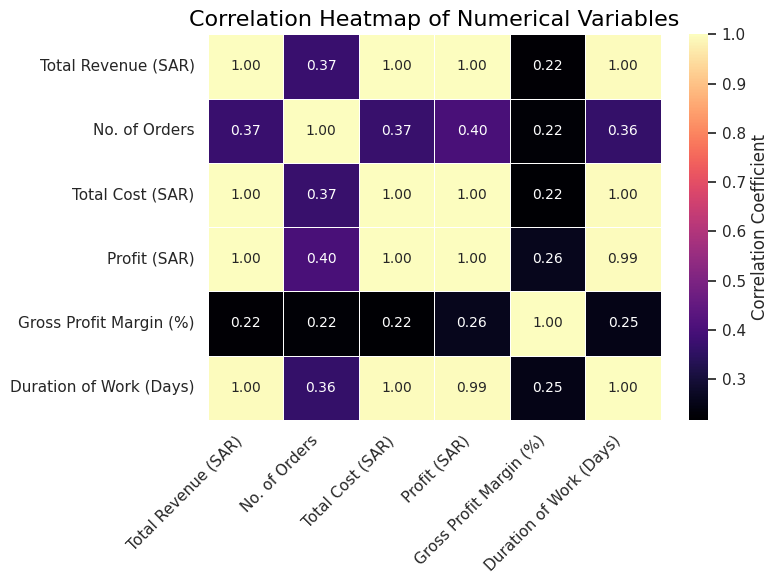

In [99]:
# Correlation Heatmap for Numerical Variables
plt.figure(figsize=(8, 6))
numerical_cols = ['Total Revenue (SAR)', 'No. of Orders', 'Total Cost (SAR)', 'Profit (SAR)', 'Gross Profit Margin (%)', 'Duration of Work (Days)']
corr = profit_data[numerical_cols].corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="magma",  # Consistent palette
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'},
    annot_kws={"size": 10}  # Adjust annotation size for better readability
)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16, color="black")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Observations:**

Duration of work aligns closely with both profit and total cost, while gross profit margin shows limited correlation with
other variables, signaling a focus on cost control for profitability.

## Thank You!
For any queries or further discussion, please feel free to contact: **Eram Nishat**

Email: 23f2004433@ds.study.iitm.ac.in